In [ ]:
### create a simple neural network (ANN)
#Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Reading the train modeling.csv file into dataset
dataset=pd.read_csv("/content/train.csv")

In [ ]:
# number of rows and columns
dataset.shape

(200000, 10)

to Know the data types in the dataset

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              200000 non-null  int64  
 1   Sex             200000 non-null  object 
 2   Length          200000 non-null  float64
 3   Diameter        200000 non-null  float64
 4   Height          200000 non-null  float64
 5   Weight          200000 non-null  float64
 6   Shucked Weight  200000 non-null  float64
 7   Viscera Weight  200000 non-null  float64
 8   Shell Weight    200000 non-null  float64
 9   Age             200000 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 15.3+ MB


In [ ]:
# how many null values with respect to columns wise
dataset.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [ ]:
# how many null values over all columns
dataset.isnull().sum().sum()

0

In [ ]:
# to see top5 rows
dataset.head()

id Sex  Length  Diameter  Height     Weight  Shucked Weight  \
0   0   M  1.5750    1.2250  0.3750  31.226974       12.303683   
1   1   I  1.2375    1.0000  0.3750  21.885814        7.654365   
2   2   F  1.4500    1.1625  0.4125  28.250277       11.127179   
3   3   I  1.3500    1.0250  0.3750  21.588144        9.738053   
4   4   I  1.1375    0.8750  0.2875  14.968536        5.953395   

   Viscera Weight  Shell Weight   Age  
0        6.321938      9.638830  10.0  
1        3.798833      7.654365  19.0  
2        7.016501      7.257472  11.0  
3        4.110678      6.378637   9.0  
4        2.962523      3.713785   8.0

In [ ]:
# data set into two parts one indepdent and dependet features
X=dataset.iloc[:,1:9]
y=dataset.iloc [:,9]

In [ ]:
X

Sex  Length  Diameter  Height     Weight  Shucked Weight  \
0        M  1.5750    1.2250  0.3750  31.226974       12.303683   
1        I  1.2375    1.0000  0.3750  21.885814        7.654365   
2        F  1.4500    1.1625  0.4125  28.250277       11.127179   
3        I  1.3500    1.0250  0.3750  21.588144        9.738053   
4        I  1.1375    0.8750  0.2875  14.968536        5.953395   
...     ..     ...       ...     ...        ...             ...   
199995   F  1.8125    1.2750  0.4375  42.141532       20.000572   
199996   F  0.9875    0.6750  0.2375   7.980384        3.742134   
199997   M  1.1250    0.9125  0.2875  10.886208        4.904464   
199998   I  1.6250    1.2750  0.4125  33.891827       13.196692   
199999   F  1.5875    1.2500  0.3875  34.373769       17.222321   

        Viscera Weight  Shell Weight  
0             6.321938      9.638830  
1             3.798833      7.654365  
2             7.016501      7.257472  
3             4.110678      6.378637  
4             2.962523      3.713785  
...                ...           ...  
199995        9.979024     11.609120  
199996        1.913591      2.267960  
199997        1.984465      3.118445  
199998        7.866986     10.489315  
199999        7.385045      8.788345  

[200000 rows x 8 columns]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Sex             200000 non-null  object 
 1   Length          200000 non-null  float64
 2   Diameter        200000 non-null  float64
 3   Height          200000 non-null  float64
 4   Weight          200000 non-null  float64
 5   Shucked Weight  200000 non-null  float64
 6   Viscera Weight  200000 non-null  float64
 7   Shell Weight    200000 non-null  float64
dtypes: float64(7), object(1)
memory usage: 12.2+ MB


In [ ]:
# converting a catgorical variable into an numerical variable by using pd.getdummies()
sex=pd.get_dummies(X['Sex'],drop_first=True)
sex

F  I  M
0       0  0  1
1       0  1  0
2       1  0  0
3       0  1  0
4       0  1  0
...    .. .. ..
199995  1  0  0
199996  1  0  0
199997  0  0  1
199998  0  1  0
199999  1  0  0

[200000 rows x 3 columns]

In [ ]:
#merging dummy coded sex into x dataset
X=pd.concat([X,sex],axis=1)

In [ ]:
X

Sex  Length  Diameter  Height     Weight  Shucked Weight  \
0        M  1.5750    1.2250  0.3750  31.226974       12.303683   
1        I  1.2375    1.0000  0.3750  21.885814        7.654365   
2        F  1.4500    1.1625  0.4125  28.250277       11.127179   
3        I  1.3500    1.0250  0.3750  21.588144        9.738053   
4        I  1.1375    0.8750  0.2875  14.968536        5.953395   
...     ..     ...       ...     ...        ...             ...   
199995   F  1.8125    1.2750  0.4375  42.141532       20.000572   
199996   F  0.9875    0.6750  0.2375   7.980384        3.742134   
199997   M  1.1250    0.9125  0.2875  10.886208        4.904464   
199998   I  1.6250    1.2750  0.4125  33.891827       13.196692   
199999   F  1.5875    1.2500  0.3875  34.373769       17.222321   

        Viscera Weight  Shell Weight  F  I  M  
0             6.321938      9.638830  0  0  1  
1             3.798833      7.654365  0  1  0  
2             7.016501      7.257472  1  0  0  
3             4.110678      6.378637  0  1  0  
4             2.962523      3.713785  0  1  0  
...                ...           ... .. .. ..  
199995        9.979024     11.609120  1  0  0  
199996        1.913591      2.267960  1  0  0  
199997        1.984465      3.118445  0  0  1  
199998        7.866986     10.489315  0  1  0  
199999        7.385045      8.788345  1  0  0  

[200000 rows x 11 columns]

In [ ]:
# DROP THE Sex column
X=X.drop(['Sex'],axis=1)

In [ ]:
X.head()

Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0  1.5750    1.2250  0.3750  31.226974       12.303683        6.321938   
1  1.2375    1.0000  0.3750  21.885814        7.654365        3.798833   
2  1.4500    1.1625  0.4125  28.250277       11.127179        7.016501   
3  1.3500    1.0250  0.3750  21.588144        9.738053        4.110678   
4  1.1375    0.8750  0.2875  14.968536        5.953395        2.962523   

   Shell Weight  F  I  M  
0      9.638830  0  0  1  
1      7.654365  0  1  0  
2      7.257472  1  0  0  
3      6.378637  0  1  0  
4      3.713785  0  1  0

In [ ]:
# splitting data into tain and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#apply standard scaler
from sklearn.preprocessing import StandardScaler # the values of each columns are different (high and lows are avaialble)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

importing libraries to find regression and classification

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense #sparse or dense
from tensorflow.keras.layers import  Dropout
from keras.layers import LeakyReLU,PReLU,ELU # activation functions

binary model classification

In [ ]:
model_binary = Sequential([
  Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
  Dropout(0.2),
  Dense(32, activation='sigmoid'),
  Dropout(0.2),
  Dense(1, activation='sigmoid')
])

# Compile the model with different optimizer and loss function
model_binary.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_binary.fit(X_train, y_train, epochs=20, batch_size=32)

# Evaluate the model
accuracy = model_binary.evaluate(X_test, y_test)[1]
print("Binary Classification Accuracy: {:.2f}%".format(accuracy * 100))

Epoch 1/20
5000/5000 [==============================] - 10s 2ms/step - loss: -571.4860 - accuracy: 2.5000e-04
Epoch 2/20
5000/5000 [==============================] - 6s 1ms/step - loss: -1644.7360 - accuracy: 2.5000e-04
Epoch 3/20
5000/5000 [==============================] - 6s 1ms/step - loss: -2724.6509 - accuracy: 2.5000e-04
Epoch 4/20
5000/5000 [==============================] - 6s 1ms/step - loss: -3903.5171 - accuracy: 2.5000e-04
Epoch 5/20
5000/5000 [==============================] - 8s 2ms/step - loss: -5107.9614 - accuracy: 2.5000e-04
Epoch 6/20
5000/5000 [==============================] - 8s 2ms/step - loss: -6310.8486 - accuracy: 2.5000e-04
Epoch 7/20
5000/5000 [==============================] - 6s 1ms/step - loss: -7508.4810 - accuracy: 2.5000e-04
Epoch 8/20
5000/5000 [==============================] - 8s 2ms/step - loss: -8712.2959 - accuracy: 2.5000e-04
Epoch 9/20
5000/5000 [==============================] - 7s 1ms/step - loss: -9911.2246 - accuracy: 2.5000e-04
Epoch 10/2

regression model

In [ ]:
# Build the regression model
model_reg = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

# Compile the model with different optimizer and loss function for regression
model_reg.compile(optimizer='adam', loss='mean_squared_error')

# Train the regression model
model_reg.fit(X_train, y_train, epochs=20, batch_size=32)

# Evaluate the regression model
mse = model_reg.evaluate(X_test, y_test)
print("Mean Squared Error for Regression: {:.4f}".format(mse))

Epoch 1/20
5000/5000 [==============================] - 7s 1ms/step - loss: 7.8475
Epoch 2/20
5000/5000 [==============================] - 7s 1ms/step - loss: 5.4266
Epoch 3/20
5000/5000 [==============================] - 6s 1ms/step - loss: 4.9263
Epoch 4/20
5000/5000 [==============================] - 7s 1ms/step - loss: 4.5984
Epoch 5/20
5000/5000 [==============================] - 6s 1ms/step - loss: 4.4098
Epoch 6/20
5000/5000 [==============================] - 6s 1ms/step - loss: 4.2948
Epoch 7/20
5000/5000 [==============================] - 6s 1ms/step - loss: 4.2130
Epoch 8/20
5000/5000 [==============================] - 6s 1ms/step - loss: 4.1595
Epoch 9/20
5000/5000 [==============================] - 6s 1ms/step - loss: 4.1340
Epoch 10/20
5000/5000 [==============================] - 7s 1ms/step - loss: 4.0962
Epoch 11/20
5000/5000 [==============================] - 7s 1ms/step - loss: 4.1030
Epoch 12/20
5000/5000 [==============================] - 8s 2ms/step - loss: 4.0785
E

taking different layers and finding the accuracy through classification





In [ ]:
# intialize the empty artifical neural network without inputs and outputs
classifier=Sequential()

In [ ]:
# adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 10))
#units are output dimension(neurons),keral_intializers are weight intilalization Technqiues

In [ ]:
# adding the second input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu')) # for relu u can use he_uniform, he_normal

In [ ]:
# adding the output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation="sigmoid"))
# for sigmoid we have to use weight intialzers as a glorot


In [ ]:
# sigmoid actiavtion function will be used in output layers if your ouptut is binary classification
#compling the ANN
classifier.compile(optimizer='Adamax',loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
# binary classification finding
model_binary = tf.keras.Sequential([
tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(32, activation='sigmoid'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(1, activation='sigmoid')
])
classifier.compile(optimizer='Adamax',loss="binary_crossentropy",metrics=["accuracy"])
annhistory=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=20)

Epoch 1/20
10720/10720 [==============================] - 23s 2ms/step - loss: -102937714688.0000 - accuracy: 2.4254e-04 - val_loss: -104443641856.0000 - val_accuracy: 2.6515e-04
Epoch 2/20
10720/10720 [==============================] - 23s 2ms/step - loss: -106365968384.0000 - accuracy: 2.4254e-04 - val_loss: -107919237120.0000 - val_accuracy: 2.6515e-04
Epoch 3/20
10720/10720 [==============================] - 18s 2ms/step - loss: -109891305472.0000 - accuracy: 2.4254e-04 - val_loss: -111473164288.0000 - val_accuracy: 2.6515e-04
Epoch 4/20
10720/10720 [==============================] - 18s 2ms/step - loss: -113480851456.0000 - accuracy: 2.4254e-04 - val_loss: -115079249920.0000 - val_accuracy: 2.6515e-04
Epoch 5/20
10720/10720 [==============================] - 18s 2ms/step - loss: -117116018688.0000 - accuracy: 2.4254e-04 - val_loss: -118747078656.0000 - val_accuracy: 2.6515e-04
Epoch 6/20
10720/10720 [==============================] - 19s 2ms/step - loss: -120852824064.0000 - accur

In [ ]:
print(annhistory.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
# Predictions and Thresholding
y_pred=classifier.predict(X_test)
y_pred=(y_pred>.5)

1250/1250 [==============================] - 1s 885us/step


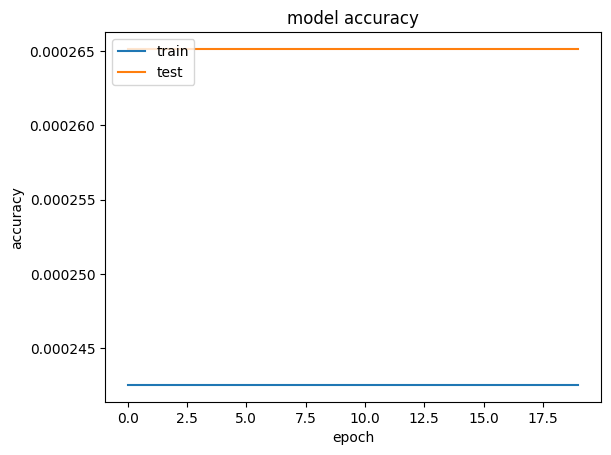

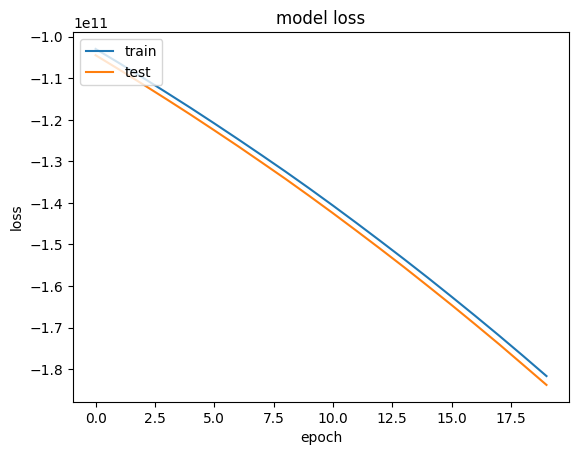

In [ ]:
#summarize histiry for accuracy
plt.plot(annhistory.history['accuracy'])
plt.plot(annhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(annhistory.history['loss'])
plt.plot(annhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [ ]:
#Accuracy score
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [ ]:
#model Accuracy
score

0.00015